In [1]:
import os
import glob
import psycopg2
import pandas as pd
from sql_queries import *
import pandas.io.sql as sqlio

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!python create_tables.py

In [3]:
!python etl.py

73 files found in data/song_data
1/73 files processed.
2/73 files processed.
3/73 files processed.
4/73 files processed.
5/73 files processed.
6/73 files processed.
7/73 files processed.
8/73 files processed.
9/73 files processed.
10/73 files processed.
11/73 files processed.
12/73 files processed.
13/73 files processed.
14/73 files processed.
15/73 files processed.
16/73 files processed.
17/73 files processed.
18/73 files processed.
19/73 files processed.
20/73 files processed.
21/73 files processed.
22/73 files processed.
23/73 files processed.
24/73 files processed.
25/73 files processed.
26/73 files processed.
27/73 files processed.
28/73 files processed.
29/73 files processed.
30/73 files processed.
31/73 files processed.
32/73 files processed.
33/73 files processed.
34/73 files processed.
35/73 files processed.
36/73 files processed.
37/73 files processed.
38/73 files processed.
39/73 files processed.
40/73 files processed.
41/73 files processed.
42/73 files processed.
43/73 file

In [4]:
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
conn.set_session(autocommit=True)
cur = conn.cursor()

In [5]:
q = """
SELECT level, count(*) as "User Count"
FROM users
GROUP BY level
"""

sqlio.read_sql_query(q, conn)

,level,User Count
0,free,76
1,paid,20


In [6]:
q = """SELECT *
FROM songplays"""

songplays = sqlio.read_sql_query(q, conn)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

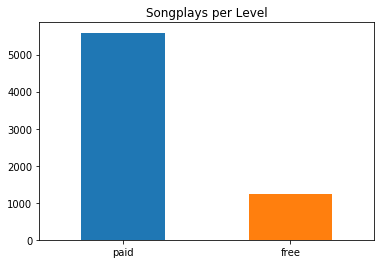

In [7]:
songplays['level'].value_counts().plot(kind='bar',
                                      title='Songplays per Level')
plt.xticks(rotation=0)

Most users are in the free tier, but the vast majority of songplays come from the paid tier.

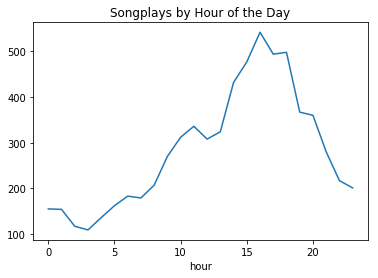

In [8]:
songplays['hour'] = songplays['start_time'].dt.hour
songplays.groupby('hour')['start_time'].count().plot(title='Songplays by Hour of the Day')

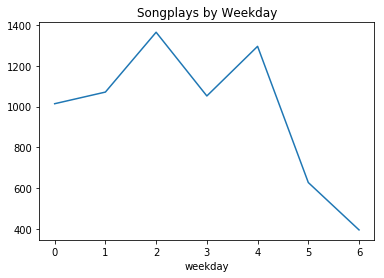

In [9]:
songplays['weekday'] = songplays['start_time'].dt.weekday
songplays.groupby('weekday')['start_time'].count().plot(title='Songplays by Weekday')